# 📌 **K-Nearest Neighbors (KNN) en Machine Learning**

## ✅ **1. Conceptos Clave**

### 🔹 ¿Qué es KNN?
K-Nearest Neighbors (KNN) es un algoritmo de **aprendizaje supervisado** utilizado para **clasificación y regresión**. Su funcionamiento se basa en la similitud entre los datos: 
- **Clasificación**: Asigna la clase más frecuente entre los *k* vecinos más cercanos. 
    Supongamos que estás en una fiesta y ves a un grupo de personas vestidas de manera similar y con temas de conversación parecidos. Tú no sabes exactamente a qué grupo pertenecerías, pero decides acercarte a las cinco personas más cercanas y ver qué tienen en común.

    Si 3 de ellos están vestidos con camisetas de bandas de rock y los otros 2 con ropa de deportes, es probable que elijas el grupo de rockeros porque son la mayoría en tu vecindad.
    Esto es clasificación: cada punto se asigna a la clase mayoritaria entre sus vecinos más cercanos.

    **Ejemplo:**

    Si queremos clasificar correos electrónicos como spam o no spam, el modelo observa los k correos más similares (según palabras, frecuencia, etc.) y asigna la categoría más común.


- **Regresión**: Calcula el promedio de los valores de los *k* vecinos más cercanos.  
    Ahora imagina que estás en una ciudad desconocida y quieres estimar el precio de un café. No sabes cuánto cuesta aquí, pero observas los cinco cafés más cercanos y ves que los precios son 2.50€, 2.80€, 2.60€, 3.00€ y 2.70€.

    En lugar de elegir un solo precio, tomas el promedio:
                (2.50 + 2.80 + 2.60 + 3.00 + 2.70) / 5 = 2.72€
    Esto es regresión: en lugar de asignar una clase, calculamos un valor numérico basado en los valores de los vecinos.

    **Ejemplo:**

    Si queremos predecir la temperatura de una ciudad en función de datos históricos de ciudades cercanas, KNN usa el promedio de las temperaturas de los k lugares más cercanos.

### 🔹 Cómo funciona KNN
1. Seleccionar hiperparámetros:  
    -K: Número de vecinos    
    -Métrica de distancia: Cómo medir la similitud (Euclídea, Manhattan, etc.)   
    -Pesos: Uniforme (todos los vecinos contribuyen por igual) o basada en la distancia (los vecinos más cercanos importan más).   

2. Calcular distancias: Calcular las distancias entre la consulta y todos los puntos de entrenamiento.
3. Identificar los vecinos más próximos: Encuentra los K puntos de entrenamiento más cercanos a la consulta.
4. Predecir: Utilizando la Media Simple o la Media Ponderada.

Aquí les dejo algunos graáficos que demuestran por ejemplo el impacto de la definición de K en nuestro modelos.

Para modelo de Clasificación sería:   

![KNN_Clasificación](knn_classificación.png)

Para modelos de Regresión sería:   

![KNN_Regresión](knn_regresión.png)

### 🔹 Importancia de la Distancia en KNN
Dado que KNN es un algoritmo basado en proximidad, la métrica de distancia es crucial para su desempeño. Algunas opciones comunes son:

#### 🔸 **Distancia Euclidiana (más utilizada)**
Es la distancia en línea recta entre dos puntos en un espacio n-dimensional:

$[
d(p, q) = \sqrt{\sum_{i=1}^{n} (q_i - p_i)^2}
$]

✅ Cuándo usarla:

Cuando los datos están normalizados o tienen escalas similares.
Si las dimensiones tienen un significado físico similar.
Cuando se trabaja con datos continuos, como imágenes o datos biométricos.
🚫 Cuándo evitarla:
Si las variables tienen escalas muy diferentes (puede dar más peso a las de mayor magnitud).
Si los datos son dispersos o categóricos.

#### 🔸 **Distancia Manhattan**
Es la suma de las diferencias absolutas entre las coordenadas de los puntos:

$[
d(p, q) = \sum_{i=1}^{n} |q_i - p_i|
$]

✅ Cuándo usarla:

Si los datos tienen alta dimensionalidad y son dispersos.
Cuando las características representan conteos o valores absolutos (por ejemplo, análisis de tráfico en calles de una ciudad).
🚫 Cuándo evitarla:
Si los datos son continuos y con valores similares en cada dimensión.

#### 🔸 **Distancia de Minkowski (Generalización de Euclidiana y Manhattan)**

$[
d(p, q) = \left( \sum_{i=1}^{n} |q_i - p_i|^p \right)^{1/p}
$]

Cuando $( p = 1 $), es la distancia Manhattan. Cuando $( p = 2 $), es la distancia Euclidiana.

✅ Cuándo usarla:

Si se quiere probar distintas distancias variando el parámetro 𝑝 (por ejemplo,𝑝=1 da Manhattan y 𝑝=2 da Euclidiana).
🚫 Cuándo evitarla:
Si no se tiene una idea clara de qué métrica se adapta mejor a los datos

#### 🔸 **Distancia de Coseno**
Mide la diferencia entre dos vectores basándose en el ángulo entre ellos, en lugar de la magnitud:

$[
\text{similaridad} = \frac{A \cdot B}{||A|| \times ||B||}
$]

✅ Cuándo usarla:

Cuando los datos son representados como vectores de texto o embeddings.
Para modelos de recomendación y NLP (Análisis de Sentimiento, TF-IDF, Word2Vec).
🚫 Cuándo evitarla:
Si la magnitud de los valores es importante (coseno ignora la magnitud y solo mide la orientación).

#### 🔸 **Distancia de Hamming (Para datos categóricos)**
✅ Cuándo usarla:

Si los datos son binarios o categóricos, como cadenas de ADN o datos de respuestas de encuestas.
En problemas de detección de errores en códigos binarios.
🚫 Cuándo evitarla:
Si los datos son numéricos o continuos.


> **Nota:** La elección de la métrica depende del tipo de datos. Por ejemplo, la distancia euclidiana es útil cuando los datos están normalizados, mientras que la de coseno se usa en modelos de texto.

---



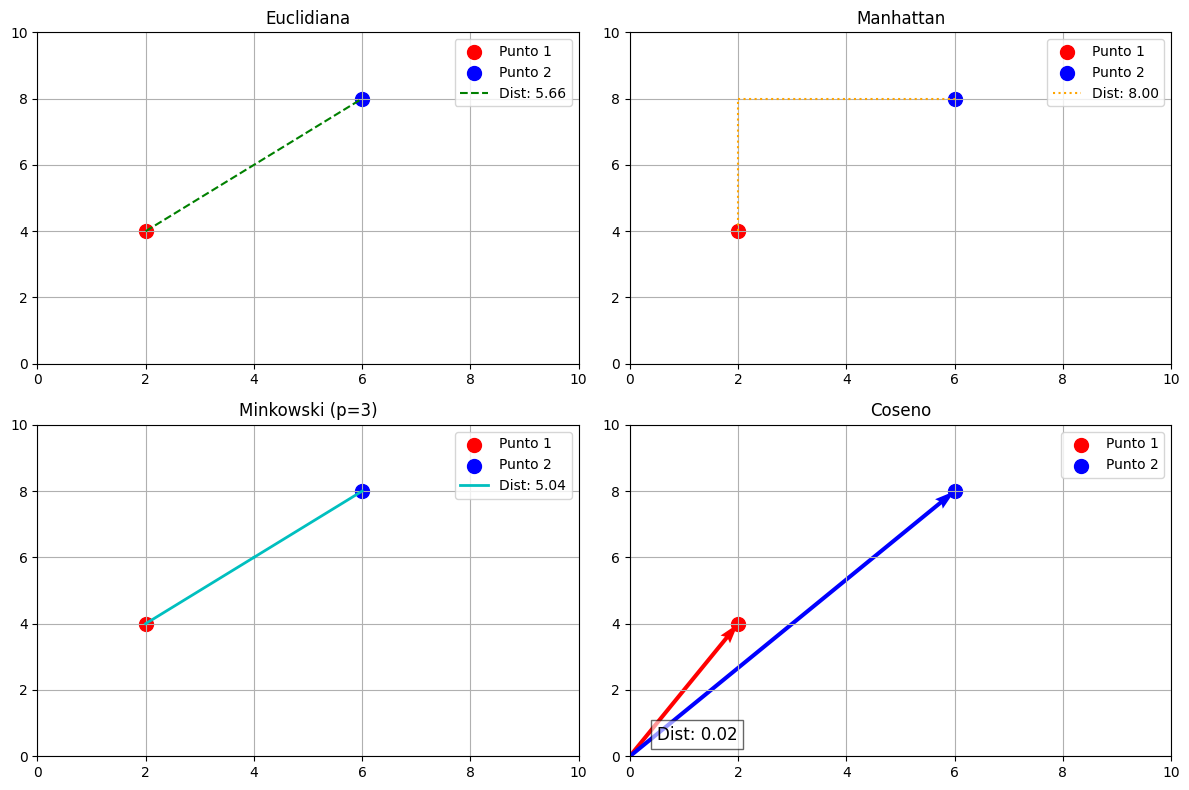

📌 Euclidiana: 5.66
📌 Manhattan: 8.00
📌 Minkowski (p=3): 5.04
📌 Coseno: 0.02


In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean, cityblock, chebyshev, minkowski, cosine

# Definir dos puntos
p1 = np.array([2, 4])
p2 = np.array([6, 8])

# Calcular distancias
distances = {
    "Euclidiana": euclidean(p1, p2),
    "Manhattan": cityblock(p1, p2),
    "Minkowski (p=3)": minkowski(p1, p2, 3),
    "Coseno": cosine(p1, p2),
}

# Configurar gráfico
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
titles = list(distances.keys())

# Graficar diferentes distancias
for i, (title, dist) in enumerate(distances.items()):
    ax = axes[i]
    ax.scatter(*p1, color='red', label="Punto 1", s=100)
    ax.scatter(*p2, color='blue', label="Punto 2", s=100)

    # Euclidiana (línea recta)
    if title == "Euclidiana":
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'g--', label=f"Dist: {dist:.2f}")

    # Manhattan (movimiento en L)
    elif title == "Manhattan":
        ax.plot([p1[0], p1[0]], [p1[1], p2[1]], 'orange', linestyle='dotted')
        ax.plot([p1[0], p2[0]], [p2[1], p2[1]], 'orange', linestyle='dotted', label=f"Dist: {dist:.2f}")

    # Minkowski con p=3
    elif title == "Minkowski (p=3)":
        ax.plot([p1[0], (p1[0] + p2[0]) / 2], [p1[1], (p1[1] + p2[1]) / 2], 'c-', linewidth=2)
        ax.plot([(p1[0] + p2[0]) / 2, p2[0]], [(p1[1] + p2[1]) / 2, p2[1]], 'c-', linewidth=2, label=f"Dist: {dist:.2f}")

    # Coseno (ángulo entre vectores)
    elif title == "Coseno":
        ax.quiver(0, 0, p1[0], p1[1], color='red', angles='xy', scale_units='xy', scale=1)
        ax.quiver(0, 0, p2[0], p2[1], color='blue', angles='xy', scale_units='xy', scale=1)
        ax.text(0.5, 0.5, f"Dist: {dist:.2f}", fontsize=12, bbox=dict(facecolor='white', alpha=0.6))
        
    ax.set_title(title)
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()

# Mostrar valores en consola
for name, value in distances.items():
    print(f"📌 {name}: {value:.2f}")



## ✅ **2. Elección del mejor *k***

Un valor de *k* pequeño puede hacer que el modelo sea **demasiado sensible al ruido** (overfitting), mientras que un valor de *k* grande puede hacer que el modelo sea **demasiado general** (underfitting). 

### 📌 Estrategias para elegir *k*
- **Regla empírica**: $( k \approx \sqrt{N} $) donde *N* es el número de observaciones.
- **Validación cruzada**: Probar varios valores de *k* y elegir el que tenga mejor desempeño.
- **Curva de error**: Graficar la tasa de error en función de *k* y elegir el valor con menor error.   

## ✅ **3. Implementación en Python**

Vamos a aplicar KNN al dataset **Wine** de scikit-learn, que contiene características químicas de diferentes tipos de vino.


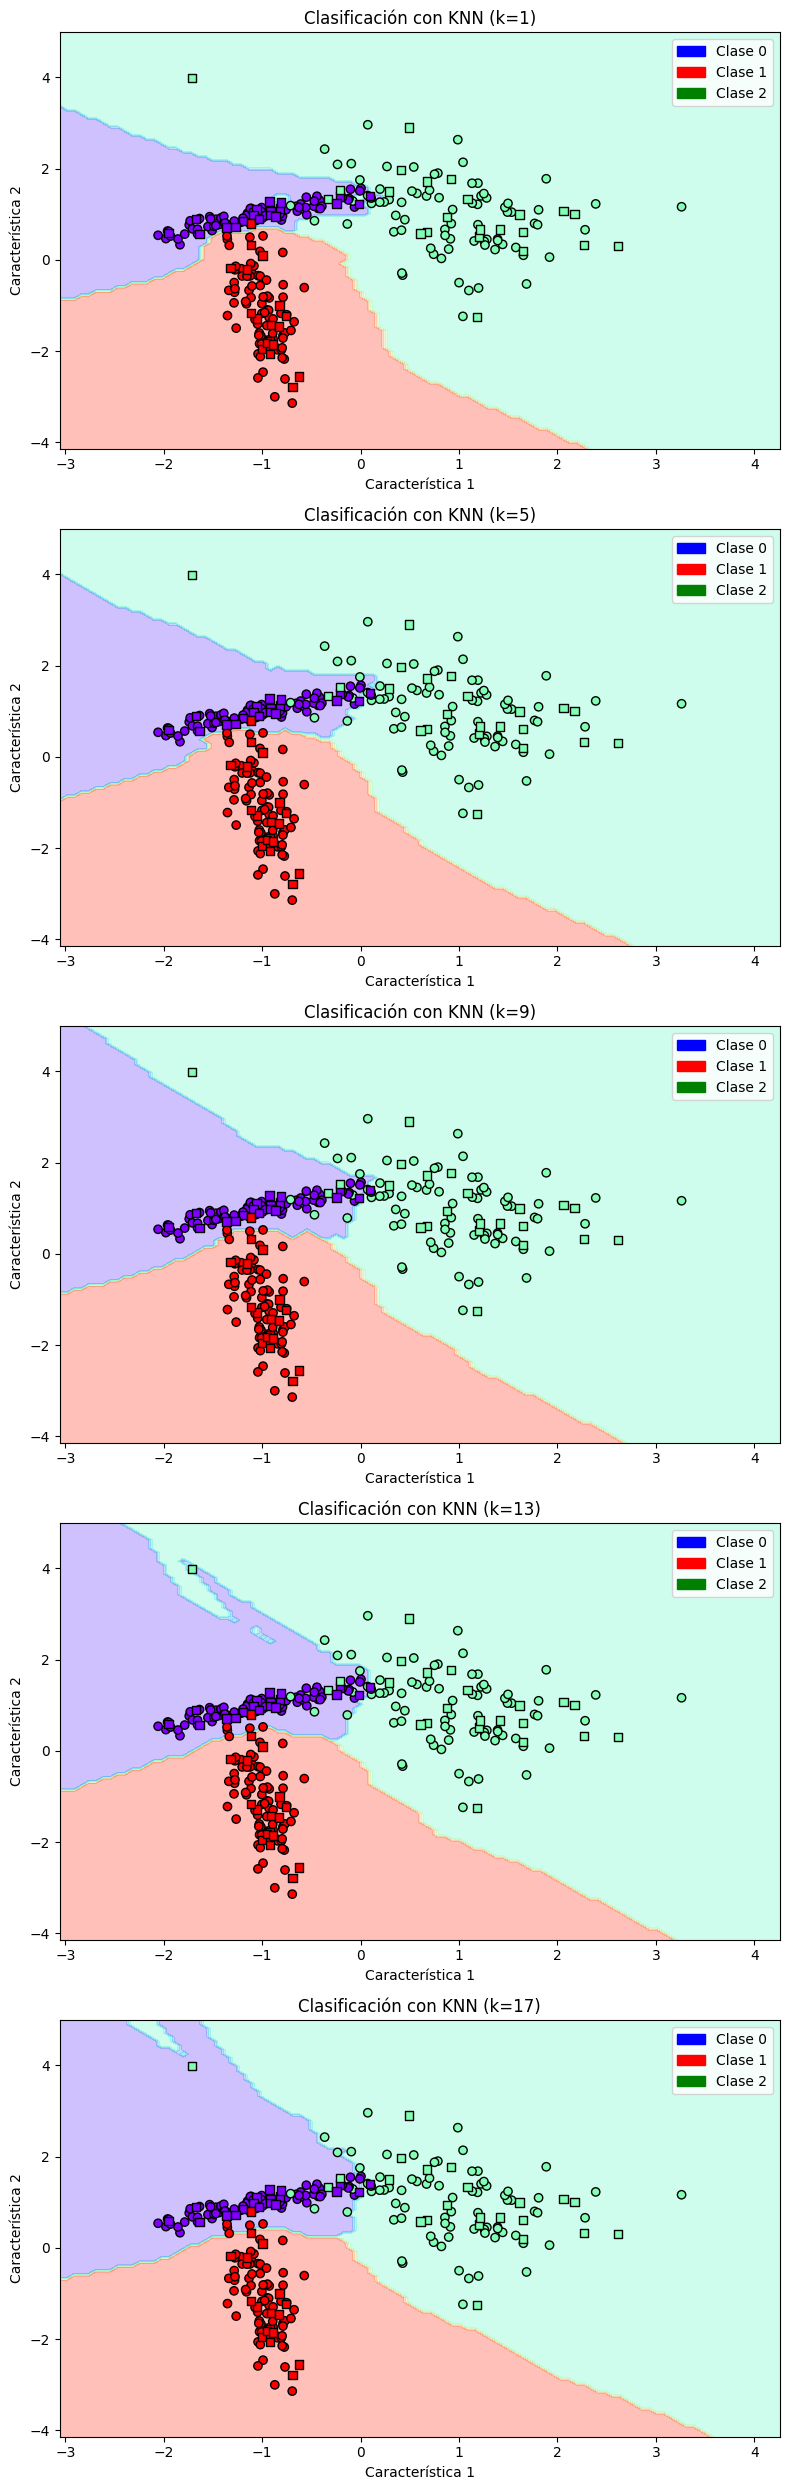

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

# Generar datos de ejemplo (3 clases)
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=3, 
                           n_clusters_per_class=1, random_state=42)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rango de valores de k a probar
k_range = range(1, 20,4)

# Crear figura para subgráficas (una por cada valor de k)
n_k_values = len(k_range)
fig, axes = plt.subplots(n_k_values, 1, figsize=(8, 5 * n_k_values))  # Ajusta el tamaño de la figura

# Iterar para cada valor de k
for i, k in enumerate(k_range):
    # Crear y entrenar modelo KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Crear malla para la visualización de la frontera de decisión
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predecir en cada punto de la malla
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Graficar la frontera de decisión
    ax = axes[i]  # Seleccionar el eje correspondiente para cada gráfico
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.rainbow)

    # Graficar puntos de entrenamiento y prueba
    scatter_train = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.rainbow, edgecolors="k", label="Train")
    scatter_test = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.rainbow, marker="s", edgecolors="k", label="Test")

    # Crear una leyenda personalizada con los colores de cada clase
    colores = ['blue', 'red', 'green']  # Ajusta los colores según tu cmap
    clases = np.unique(y)
    leyenda = [mpatches.Patch(color=colores[i], label=f'Clase {clases[i]}') for i in range(len(clases))]
    ax.legend(handles=leyenda, loc="upper right")

    # Título y etiquetas
    ax.set_title(f"Clasificación con KNN (k={k})")
    ax.set_xlabel("Característica 1")
    ax.set_ylabel("Característica 2")

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.savefig("knn_classificación.png")

# Mostrar el gráfico
plt.show()


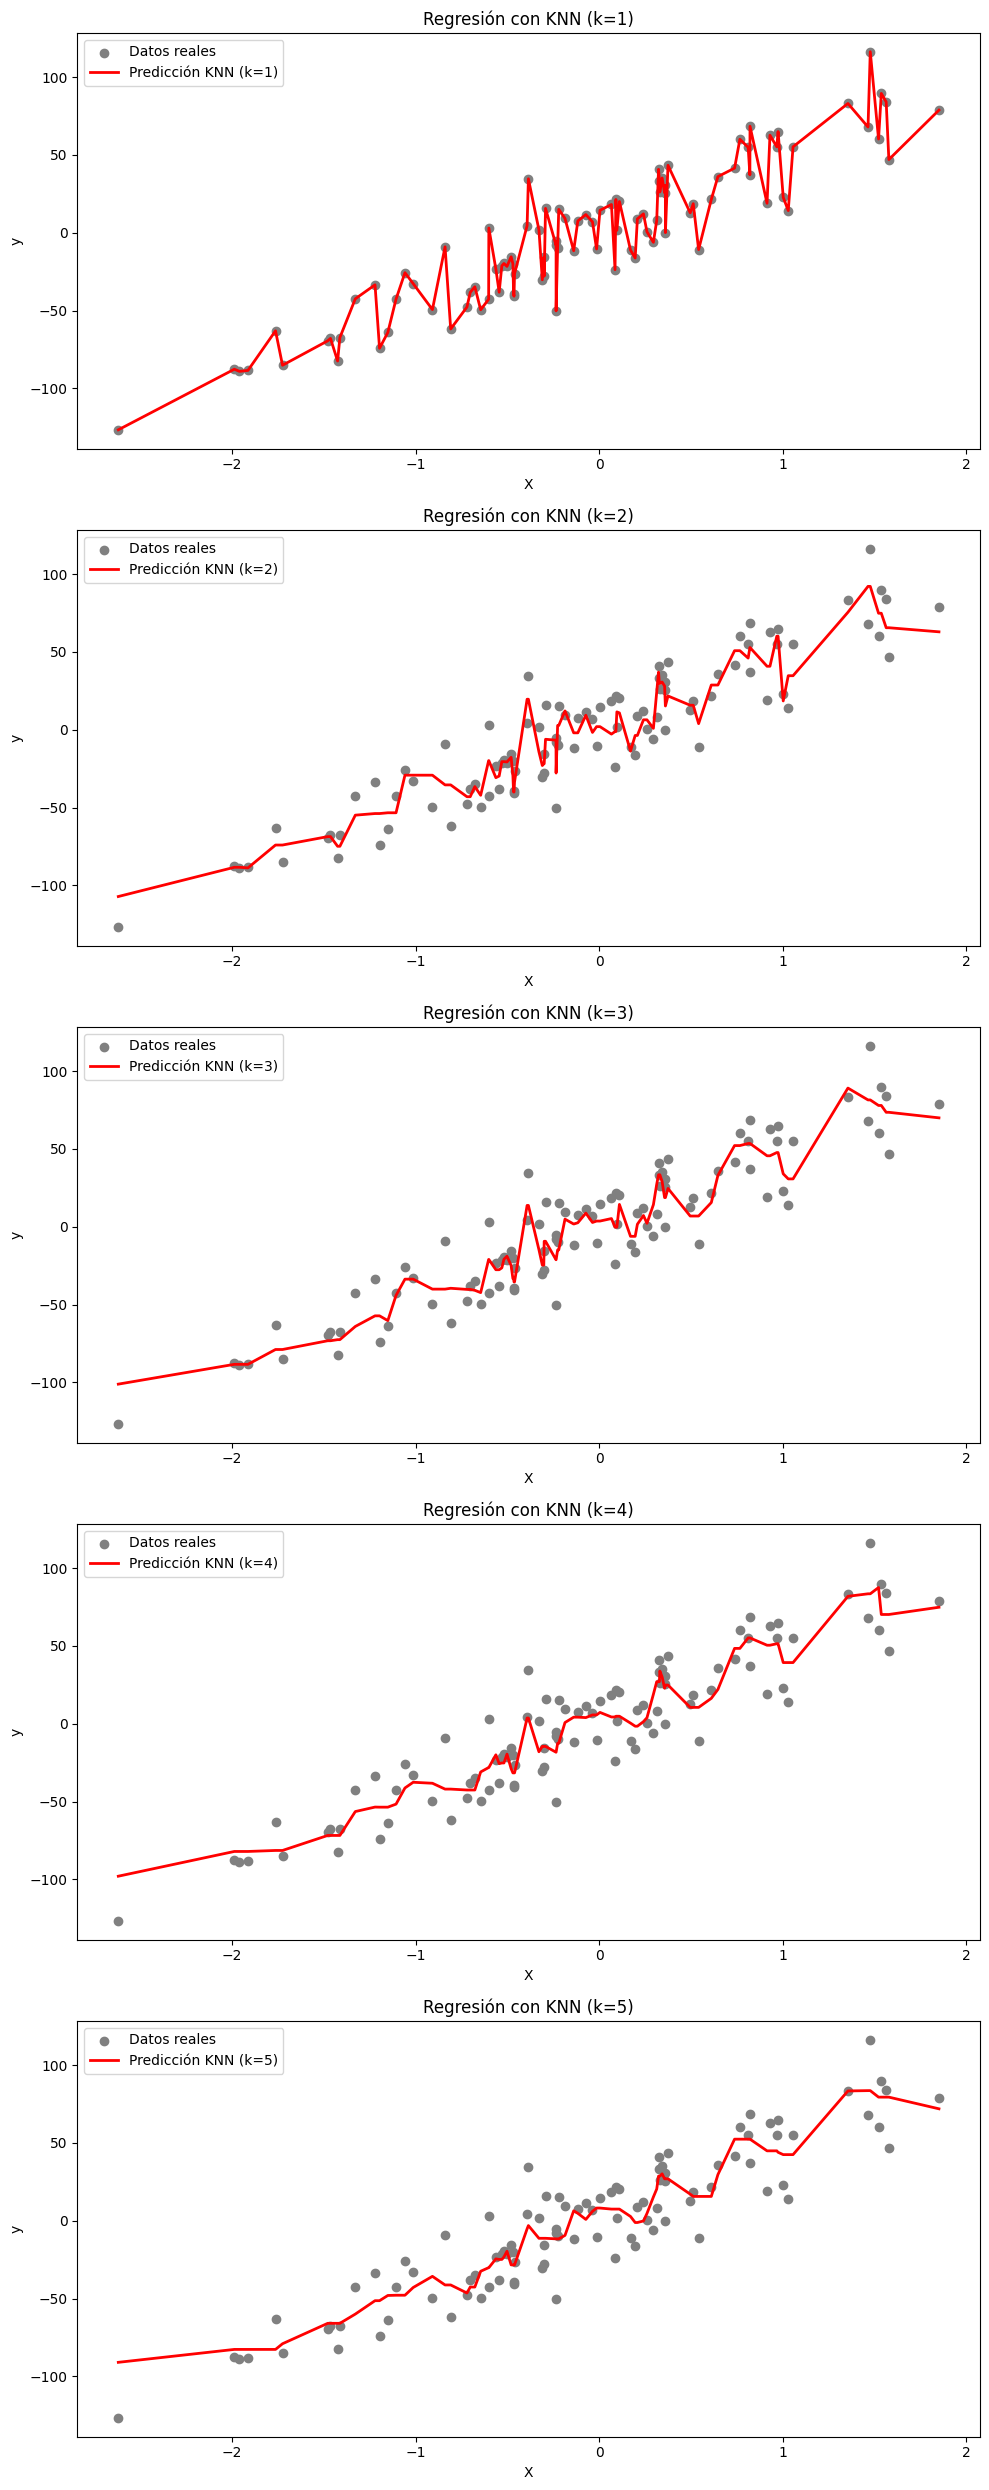

In [60]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor

# Crear datos sintéticos para regresión
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

# Ordenar los datos para visualización
X_plot = np.sort(X, axis=0)

# Número de subgráficas (número de valores de k)
n_k_values = 5  # o cualquier otro número según tus necesidades

# Crear figura
fig, axes = plt.subplots(n_k_values, 1, figsize=(10, 5 * n_k_values))  # Ajustar tamaño de la figura

# Iterar para distintos valores de k
for k in range(1, n_k_values + 1):  # Ajusta el rango si quieres más o menos valores de k
    # Entrenar modelo de regresión KNN
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X, y)

    # Predicción con KNN
    y_pred = knn_reg.predict(X_plot)

    # Graficar resultados
    ax = axes[k - 1]  # Seleccionar el eje correspondiente para cada gráfico
    ax.scatter(X, y, color="gray", label="Datos reales")
    ax.plot(X_plot, y_pred, color="red", linewidth=2, label=f"Predicción KNN (k={k})")
    ax.set_xlabel("X")
    ax.set_ylabel("y")
    ax.set_title(f"Regresión con KNN (k={k})")
    ax.legend()

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.savefig("knn_regresión.png")

# Mostrar la figura con los subgráficos
plt.show()


Precisión del modelo: 0.94

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



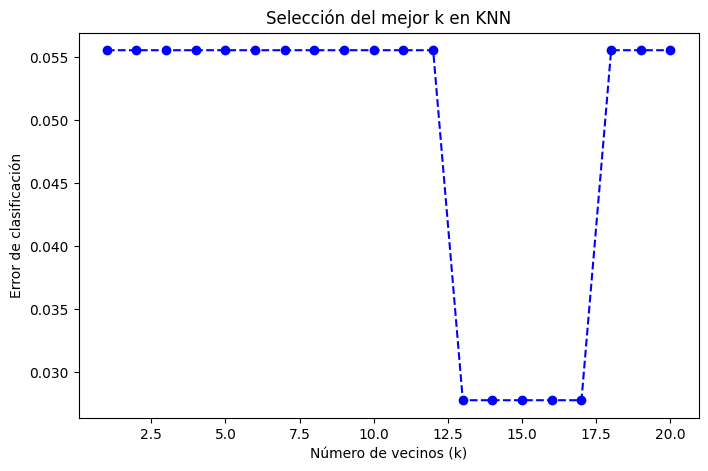

In [61]:
### 📌 **Paso 1: Importar librerías**
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


### 📌 **Paso 2: Cargar y preparar los datos**
# Cargar dataset Wine
dataset = load_wine()
X = dataset.data  # Características químicas del vino
y = dataset.target  # Tipos de vino

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 📌 **Paso 3: Normalizar los datos**

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### 📌 **Paso 4: Entrenar el modelo KNN**

# Definir modelo con k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


### 📌 **Paso 5: Evaluar el modelo**

# Predicciones
y_pred = knn.predict(X_test)

# Métricas de desempeño
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

### 📌 **Paso 6: Selección del mejor *k***

errors = []
k_range = range(1, 21)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    errors.append(1 - accuracy_score(y_test, y_pred))  # Error = 1 - precisión

# Graficar el error en función de k
plt.figure(figsize=(8, 5))
plt.plot(k_range, errors, marker='o', linestyle='dashed', color='b')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Error de clasificación')
plt.title('Selección del mejor k en KNN')
plt.show()


### 👉 **Conclusión**: Elegimos el *k* donde el error es más bajo.



---

## ✅ **4. Conclusiones y Consideraciones**
- **KNN es simple e intuitivo**, pero su rendimiento depende de la métrica de distancia y el valor de *k*.
- **La normalización de datos es crucial**, ya que KNN se basa en distancias.
- **No escala bien en grandes volúmenes de datos**, ya que su tiempo de consulta crece con el número de muestras.
- **Existen métodos más eficientes**, como árboles de decisión o SVM, en datasets grandes.


